In [1]:
#Import module
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats
import scipy.optimize as optimization  
import pandas as pd
#Latex font
import matplotlib as mpl
from matplotlib import rc
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=16)

In [2]:
ls

2022_Feb_week4_Weighted_mean_calculation_Beuermann_2011_combined.out
2022_Mar_week2_Weighted_mean_calculation_Beuermann_2011_combined.txt
2D_orbit_modeling_K.pdf
2D_orbit_modeling_K1.ipynb
2D_orbit_modeling_K1.pdf
2D_orbit_modeling_K2.ipynb
2D_orbit_modeling_K2.pdf
2D_orbit_modeling_P.ipynb
2D_orbit_modeling_P.pdf
2D_orbit_modeling_e.ipynb
2D_orbit_modeling_e.pdf
2D_orbit_modeling_tau.ipynb
2D_orbit_modeling_tau.pdf
2D_orbit_modeling_w.ipynb
2D_orbit_modeling_w.pdf
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K.ipynb
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K1.pdf
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K2.pdf
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K2_rev2.ipynb
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K2_rev2.pdf
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K_rev.ipynb
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K_rev.pdf
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K_rev1.ipynb
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K_rev2

In [3]:
#Read data ---#1
Input = "Linear_fit_Beuermann_2011_Table1_rev.dat"
Data   = np.genfromtxt(Input)

#Input calculation ---#1
N = 2400000

Epoch = Data[:,0]
T_obs = Data[:,1]
T_obs_err = Data[:,2]

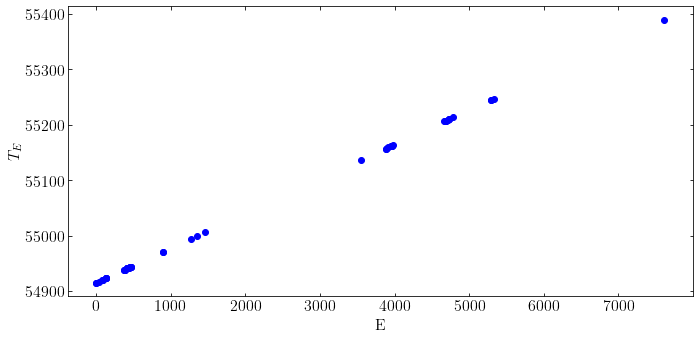

In [4]:
fig, (ax0) = plt.subplots(1, 1, sharex=True, sharey=False, figsize=(10, 5), tight_layout=True)
#plt.xlim(-0.04,0.04)
#plt.xlabel('Orbital phase')

ax0.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
#ax1.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

ax0.errorbar(Epoch, T_obs, yerr= T_obs_err, fmt='o', color='blue',
             ecolor='lightgray', elinewidth=1, capsize=0)


#ax0.legend(loc="best")
ax0.set_xlabel('E')
ax0.set_ylabel('$T_{E}$')

#ax0.set_ylim(-30, 40)

fig.align_ylabels()
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
#plt.savefig("spot_longitude_Beuermann_Kittipong.png")
plt.show()

In [5]:
x = Epoch
y = T_obs
dy = T_obs_err

len_x = len(x)
print(len_x)

54


In [6]:
# Calling the scipy's curve_fit function from optimize module
from scipy.optimize import curve_fit

# Defining a fitting fucntion
def linear_fit(x,m,c):
    return m*x + c

#params, covariance = curve_fit(f = linear_fit, xdata = x, ydata = y)
params, params_covariance = optimization.curve_fit(linear_fit, x, y,sigma=dy, absolute_sigma=True)

Period = params[0]
T0 = params[1]

dPeriod = params_covariance[0,0]
dT0 = params_covariance[1,1]


print('Slope (m) is ', Period)
print('The error of the slope (dm) is ', dPeriod)
print('Intercept (c) is ', T0)
print('The error of the intercept (dc) is ', dT0)
#print(covariance)

Slope (m) is  0.06236285649304073
The error of the slope (dm) is  8.980005261065642e-19
Intercept (c) is  54914.832292031744
The error of the intercept (dc) is  7.591088868471324e-12


In [7]:
# define a sequence of inputs between the smallest and largest known inputs
x_min, x_max = np.amin(x), np.amax(x)
x_line = np.linspace(x_min, x_max)
# calculate the output for the range
y_line = linear_fit(x_line, *params)

ys = Period*x + T0 #just only our data point
Residual = y - ys
print(y)
print(ys)
print(Residual)

print(x_line)
print(y_line)
print(len(x_line))

#np.savetxt("Linear_fit_period_year_2020g.out", np.c_[x, Residual, dy])

#Reduced_chisqrt
n = 2
dof = len_x - n
Chi_sqr = ((y - ys)**2/(dy)**2)/dof
Reduced_chisq = sum(Chi_sqr)
print(Reduced_chisq)

[54914.83228  54914.894663 54916.827926 54919.696603 54920.756784
 54922.627668 54922.690017 54922.752365 54922.814727 54937.781831
 54937.844195 54938.717285 54938.779611 54940.650507 54940.712869
 54940.775243 54940.837637 54941.773045 54941.835408 54942.646122
 54942.770852 54942.833221 54942.895591 54943.706304 54943.768653
 54943.831008 54970.647033 54970.709414 54993.658926 54998.647982
 55005.632601 55135.970976 55156.9249   55156.987244 55157.922708
 55158.982865 55160.916107 55160.978466 55161.913906 55161.976285
 55162.911738 55205.942102 55206.004463 55206.93992  55207.002308
 55208.873171 55209.870977 55209.933305 55209.995687 55212.989111
 55244.918892 55244.981257 55246.976864 55389.66308 ]
[54914.83229203 54914.89465489 54916.82790344 54919.69659484
 54920.7567634  54922.62764909 54922.69001195 54922.75237481
 54922.81473766 54937.78182322 54937.84418608 54938.71726607
 54938.77962893 54940.65051462 54940.71287748 54940.77524033
 54940.83760319 54941.77304604 54941.83540

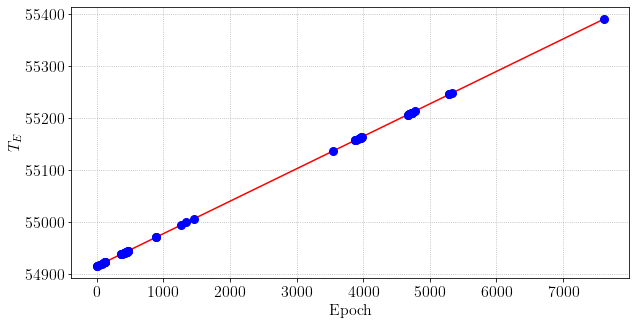

In [8]:
#Plotgraph
fig=plt.figure(figsize=(10, 5))
plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray')
# create a line plot for the mapping function
plt.plot(x_line, y_line, '-', color='red')
#plt.plot(BJD_time, OC_s_ecc, lw=2, color='black')
#plt.xlim(-6000,6000)
#plt.ylim(-200,200)
#plt.ylim(-40,60)
plt.xlabel('Epoch')
plt.ylabel('$T_{E}$')
plt.grid(linestyle='dotted')
#####plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
plt.show()

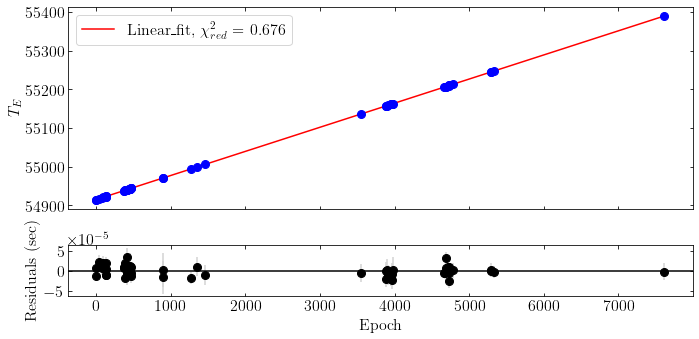

In [9]:
fig, (ax0, ax1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1]}, sharex=True, sharey=False, figsize=(10, 5), tight_layout=True)
plt.xlabel('Epoch')

ax0.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
ax1.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

ax0.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray')
ax0.plot(x_line, y_line, '-', color='red',label='Linear\_fit, $\chi_{red}^{2}$ = '+str('%0.3f' %(Reduced_chisq)))

ax0.legend(loc="best")
ax0.set_ylabel('$T_{E}$')
ax1.set_ylabel('Residuals (sec)')


ax1.errorbar(x, Residual, yerr= dy, fmt='o', markersize=8, color='black', ecolor='lightgray')
ax1.axhline(y=0, color='black', linestyle='-')
#plt.savefig("Linear_fit_period_year_2020g_Res.jpg", dpi=1000)

plt.show()

In [10]:
#Linear phemeris equation(From equation 1) convert from TT to TDB
#New ephemeris
#BJD0 = 2448773.21461 - 2400000
#P0 = 0.0623628426

#Schwope_2002
BJD0 = 2448773.215071 - 2400000
dBJD0 = 0.000018
P0 = 0.06236283691
dP0 = 0.00000000070

In [11]:
t = np.linspace(40000, 60000, num=100)

x_data = []
for i in range(len(t)):
    print('%0.0f %0.5f' %(i, t[i]))
    x_data.append('%0.0f %0.5f' %(i, t[i]))
    
data_out = x_data
f = open("x_data.out", 'w')
for i in range(len(data_out)):
    f.write(str(data_out[i])+ '\n')
f.close()

0 40000.00000
1 40202.02020
2 40404.04040
3 40606.06061
4 40808.08081
5 41010.10101
6 41212.12121
7 41414.14141
8 41616.16162
9 41818.18182
10 42020.20202
11 42222.22222
12 42424.24242
13 42626.26263
14 42828.28283
15 43030.30303
16 43232.32323
17 43434.34343
18 43636.36364
19 43838.38384
20 44040.40404
21 44242.42424
22 44444.44444
23 44646.46465
24 44848.48485
25 45050.50505
26 45252.52525
27 45454.54545
28 45656.56566
29 45858.58586
30 46060.60606
31 46262.62626
32 46464.64646
33 46666.66667
34 46868.68687
35 47070.70707
36 47272.72727
37 47474.74747
38 47676.76768
39 47878.78788
40 48080.80808
41 48282.82828
42 48484.84848
43 48686.86869
44 48888.88889
45 49090.90909
46 49292.92929
47 49494.94949
48 49696.96970
49 49898.98990
50 50101.01010
51 50303.03030
52 50505.05051
53 50707.07071
54 50909.09091
55 51111.11111
56 51313.13131
57 51515.15152
58 51717.17172
59 51919.19192
60 52121.21212
61 52323.23232
62 52525.25253
63 52727.27273
64 52929.29293
65 53131.31313
66 53333.33333
67 53

In [12]:
#Input data
Input = "x_data.out"
Data   = np.genfromtxt(Input)

x = Data[:,1]
#print(t)

t = x
len_x = len(t)

Epoch = (t-BJD0)/P0

In [13]:
def TAno(P,tau,e,t):
    MAno = 2*np.pi/P*((t-tau)%P)
    EFunc = lambda x: x-e*np.sin(x)-MAno
    EAno = fsolve(EFunc, MAno)
    f = np.arccos((np.cos(EAno)-e)/(1-e*np.cos(EAno)))
    f = np.where(EAno>np.pi,-f,f)
    return f

In [14]:
from scipy.optimize import fsolve
from scipy.optimize import curve_fit

In [15]:
#Parameters
K = 33.7       
P = 9000       
e = 0.39              
w = -1.36           
tau = 53025   

output = []
print("     BJD      MAno   EAno        O           C         OC")
for i in range(len_x):
 #   print(i, x[i])
    MAno = 2*np.pi/P*((t-tau)%P)
    EFunc = lambda x: x-e*np.sin(x)-MAno
    EAno = fsolve(EFunc, MAno)
    f = np.arccos((np.cos(EAno)-e)/(1-e*np.cos(EAno)))
    f = np.where(EAno>np.pi,-f,f)
    f = TAno(P,tau,e,t)
    O = Period*Epoch + T0 + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))
    C = P0*Epoch + T0
    dP = Period - P0
    dT0 = T0 - T0
    OC = dP*Epoch + dT0 + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))
    print('%0.5f %0.5f %0.5f %0.5f %0.5f %0.5f' %(x[i], MAno[i], EAno[i],  O[i], C[i], OC[i]))
    output.append('%0.5f %0.5f %0.5f %0.5f %0.5f %0.5f' %(x[i], MAno[i], EAno[i],  O[i], C[i], OC[i]))
    
data_out = output
f = open("P_output_a.out", 'w')
for i in range(len(data_out)):
    f.write(str(data_out[i])+ '\n')
f.close()

     BJD      MAno   EAno        O           C         OC
40000.00000 3.47321 3.38080 46184.94383 46141.61722 43.32661
40202.02020 3.61424 3.48349 46385.35660 46343.63742 41.71918
40404.04040 3.75528 3.58719 46585.44480 46545.65762 39.78718
40606.06061 3.89632 3.69225 46785.21272 46747.67783 37.53489
40808.08081 4.03735 3.79903 46984.66499 46949.69803 34.96696
41010.10101 4.17839 3.90792 47183.80704 47151.71823 32.08881
41212.12121 4.31943 4.01939 47382.64557 47353.73843 28.90714
41414.14141 4.46046 4.13392 47581.18933 47555.75863 25.43069
41616.16162 4.60150 4.25209 47779.45018 47757.77884 21.67134
41818.18182 4.74254 4.37458 47977.44465 47959.79904 17.64561
42020.20202 4.88357 4.50216 48175.19618 48161.81924 13.37694
42222.22222 5.02461 4.63575 48372.73851 48363.83944 8.89907
42424.24242 5.16565 4.77645 48570.12058 48565.85964 4.26094
42626.26263 5.30668 4.92551 48767.41390 48767.87985 -0.46595
42828.28283 5.44772 5.08440 48964.72310 48969.90005 -5.17695
43030.30303 5.58876 5.25472 4

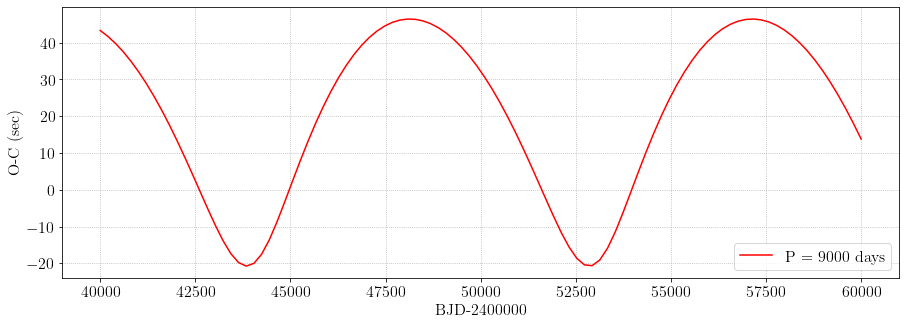

In [16]:
InputFile_out = "P_output_a.out"
Data_out   = np.genfromtxt(InputFile_out)

#Read the wd data: BJD vs. Relative flux
x_a = Data_out[:,0]
y_a = Data_out[:,5]

#print(y_range)

N_BMJD = 2400000
#Plotgraph
fig=plt.figure(figsize=(15, 5))
#plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray',label='Data')
# create a line plot for the mapping function
plt.plot(x_a, y_a, '-', color='red',label='P = 9000 days')
#plt.plot(BJD_time, OC_s_ecc, lw=2, color='black')
#plt.xlim(-6000,6000)
#plt.ylim(-200,200)
#plt.ylim(-40,60)
plt.xlabel('BJD-'+str(N_BMJD))
plt.ylabel('O-C (sec)')
plt.grid(linestyle='dotted')
plt.legend(loc="best")
#####plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig("2022_Feb_week4_new_ephemeris_LTT_fit.jpg", dpi=1000)
plt.show()

In [17]:
#Parameters
K = 33.7       
P = 10000       
e = 0.39              
w = -1.36           
tau = 53025   

output = []
print("     BJD      MAno   EAno        O           C         OC")
for i in range(len_x):
 #   print(i, x[i])
    MAno = 2*np.pi/P*((t-tau)%P)
    EFunc = lambda x: x-e*np.sin(x)-MAno
    EAno = fsolve(EFunc, MAno)
    f = np.arccos((np.cos(EAno)-e)/(1-e*np.cos(EAno)))
    f = np.where(EAno>np.pi,-f,f)
    f = TAno(P,tau,e,t)
    O = Period*Epoch + T0 + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))
    C = P0*Epoch + T0
    dP = Period - P0
    dT0 = T0 - T0
    OC = dP*Epoch + dT0 + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))
    print('%0.5f %0.5f %0.5f %0.5f %0.5f %0.5f' %(x[i], MAno[i], EAno[i],  O[i], C[i], OC[i]))
    output.append('%0.5f %0.5f %0.5f %0.5f %0.5f %0.5f' %(x[i], MAno[i], EAno[i],  O[i], C[i], OC[i]))
    
data_out = output
f = open("P_output_b.out", 'w')
for i in range(len(data_out)):
    f.write(str(data_out[i])+ '\n')
f.close()

     BJD      MAno   EAno        O           C         OC
40000.00000 4.38252 4.07021 46169.00449 46141.61722 27.38727
40202.02020 4.50945 4.17452 46367.79315 46343.63742 24.15573
40404.04040 4.63639 4.28196 46566.35673 46545.65762 20.69911
40606.06061 4.76332 4.39304 46764.70854 46747.67783 17.03071
40808.08081 4.89025 4.50834 46962.86685 46949.69803 13.16882
41010.10101 5.01719 4.62856 47160.85707 47151.71823 9.13884
41212.12121 5.14412 4.75447 47358.71473 47353.73843 4.97630
41414.14141 5.27105 4.88698 47556.48976 47555.75863 0.73113
41616.16162 5.39799 5.02715 47754.25258 47757.77884 -3.52626
41818.18182 5.52492 5.17610 47952.10214 47959.79904 -7.69690
42020.20202 5.65185 5.33504 48150.17619 48161.81924 -11.64305
42222.22222 5.77879 5.50501 48348.66172 48363.83944 -15.17772
42424.24242 5.90572 5.68661 48547.80015 48565.85964 -18.05949
42626.26263 6.03265 5.87943 48747.87479 48767.87985 -20.00506
42828.28283 6.15958 6.08143 48949.16352 48969.90005 -20.73653
43030.30303 0.00333 0.005

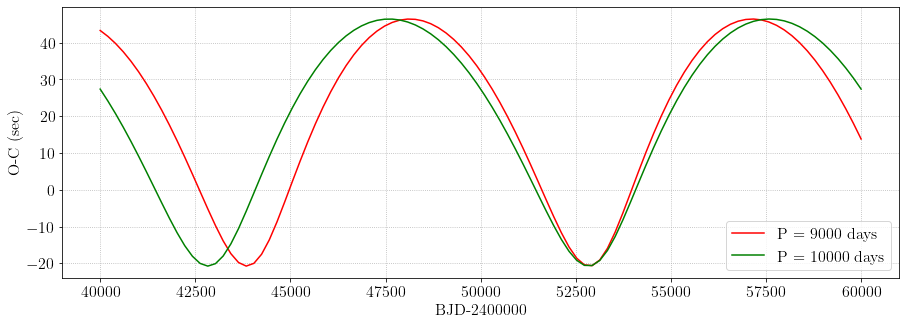

In [18]:
InputFile_out = "P_output_b.out"
Data_out   = np.genfromtxt(InputFile_out)

#Read the wd data: BJD vs. Relative flux
x_b = Data_out[:,0]
y_b = Data_out[:,5]

#print(y_range)

N_BMJD = 2400000
#Plotgraph
fig=plt.figure(figsize=(15, 5))
#plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray',label='Data')
# create a line plot for the mapping function
plt.plot(x_a, y_a, '-', color='red',label='P = 9000 days')
plt.plot(x_b, y_b, '-', color='green',label='P = 10000 days')
#plt.plot(BJD_time, OC_s_ecc, lw=2, color='black')
#plt.xlim(-6000,6000)
#plt.ylim(-200,200)
#plt.ylim(-40,60)
plt.xlabel('BJD-'+str(N_BMJD))
plt.ylabel('O-C (sec)')
plt.grid(linestyle='dotted')
plt.legend(loc="best")
#####plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig("2022_Feb_week4_new_ephemeris_LTT_fit.jpg", dpi=1000)
plt.show()

In [19]:
#Parameters
K = 33.7       
P = 11000       
e = 0.39              
w = -1.36           
tau = 53025   

output = []
print("     BJD      MAno   EAno        O           C         OC")
for i in range(len_x):
 #   print(i, x[i])
    MAno = 2*np.pi/P*((t-tau)%P)
    EFunc = lambda x: x-e*np.sin(x)-MAno
    EAno = fsolve(EFunc, MAno)
    f = np.arccos((np.cos(EAno)-e)/(1-e*np.cos(EAno)))
    f = np.where(EAno>np.pi,-f,f)
    f = TAno(P,tau,e,t)
    O = Period*Epoch + T0 + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))
    C = P0*Epoch + T0
    dP = Period - P0
    dT0 = T0 - T0
    OC = dP*Epoch + dT0 + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))
    print('%0.5f %0.5f %0.5f %0.5f %0.5f %0.5f' %(x[i], MAno[i], EAno[i],  O[i], C[i], OC[i]))
    output.append('%0.5f %0.5f %0.5f %0.5f %0.5f %0.5f' %(x[i], MAno[i], EAno[i],  O[i], C[i], OC[i]))
    
data_out = output
f = open("P_output_c.out", 'w')
for i in range(len(data_out)):
    f.write(str(data_out[i])+ '\n')
f.close()

     BJD      MAno   EAno        O           C         OC
40000.00000 5.12651 4.73662 46147.17695 46141.61722 5.55973
40202.02020 5.24190 4.85591 46345.34715 46343.63742 1.70973
40404.04040 5.35730 4.98131 46543.49176 46545.65762 -2.16586
40606.06061 5.47269 5.11367 46741.67837 46747.67783 -5.99946
40808.08081 5.58808 5.25387 46939.99866 46949.69803 -9.69938
41010.10101 5.70348 5.40279 47138.57518 47151.71823 -13.14305
41212.12121 5.81887 5.56110 47337.56694 47353.73843 -16.17149
41414.14141 5.93426 5.72904 47537.16921 47555.75863 -18.58942
41616.16162 6.04966 5.90603 47737.59956 47757.77884 -20.17928
41818.18182 6.16505 6.09029 47939.06137 47959.79904 -20.73767
42020.20202 6.28044 6.27869 48141.68632 48161.81924 -20.13292
42222.22222 0.11265 0.18401 48345.47985 48363.83944 -18.35959
42424.24242 0.22805 0.36855 48550.30769 48565.85964 -15.55195
42626.26263 0.34344 0.54594 48755.93736 48767.87985 -11.94249
42828.28283 0.45883 0.71433 48962.10595 48969.90005 -7.79410
43030.30303 0.57423 

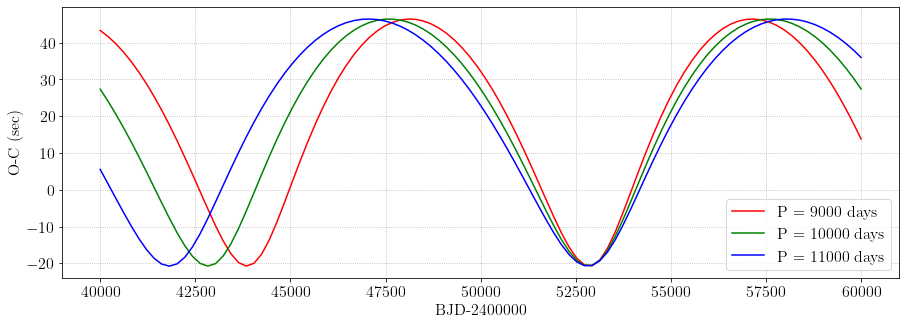

In [20]:
InputFile_out = "P_output_c.out"
Data_out   = np.genfromtxt(InputFile_out)

#Read the wd data: BJD vs. Relative flux
x_c = Data_out[:,0]
y_c = Data_out[:,5]

#print(y_range)

N_BMJD = 2400000
#Plotgraph
fig=plt.figure(figsize=(15, 5))
#plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray',label='Data')
# create a line plot for the mapping function
plt.plot(x_a, y_a, '-', color='red',label='P = 9000 days')
plt.plot(x_b, y_b, '-', color='green',label='P = 10000 days')
plt.plot(x_c, y_c, '-', color='blue',label='P = 11000 days')
#plt.plot(BJD_time, OC_s_ecc, lw=2, color='black')
#plt.xlim(-6000,6000)
#plt.ylim(-200,200)
#plt.ylim(-40,60)
plt.xlabel('BJD-'+str(N_BMJD))
plt.ylabel('O-C (sec)')
plt.grid(linestyle='dotted')
plt.legend(loc="best")
#####plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig("2022_Feb_week4_new_ephemeris_LTT_fit.jpg", dpi=1000)
plt.show()

In [21]:
#Parameters
K = 33.7       
P = 12000       
e = 0.39              
w = -1.36           
tau = 53025   

output = []
print("     BJD      MAno   EAno        O           C         OC")
for i in range(len_x):
 #   print(i, x[i])
    MAno = 2*np.pi/P*((t-tau)%P)
    EFunc = lambda x: x-e*np.sin(x)-MAno
    EAno = fsolve(EFunc, MAno)
    f = np.arccos((np.cos(EAno)-e)/(1-e*np.cos(EAno)))
    f = np.where(EAno>np.pi,-f,f)
    f = TAno(P,tau,e,t)
    O = Period*Epoch + T0 + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))
    C = P0*Epoch + T0
    dP = Period - P0
    dT0 = T0 - T0
    OC = dP*Epoch + dT0 + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))
    print('%0.5f %0.5f %0.5f %0.5f %0.5f %0.5f' %(x[i], MAno[i], EAno[i],  O[i], C[i], OC[i]))
    output.append('%0.5f %0.5f %0.5f %0.5f %0.5f %0.5f' %(x[i], MAno[i], EAno[i],  O[i], C[i], OC[i]))
    
data_out = output
f = open("P_output_d.out", 'w')
for i in range(len(data_out)):
    f.write(str(data_out[i])+ '\n')
f.close()

     BJD      MAno   EAno        O           C         OC
40000.00000 5.74650 5.46069 46127.28652 46141.61722 -14.33070
40202.02020 5.85227 5.60873 46326.69346 46343.63742 -16.94396
40404.04040 5.95805 5.76482 46526.66514 46545.65762 -18.99248
40606.06061 6.06383 5.92832 46727.37050 46747.67783 -20.30733
40808.08081 6.16961 6.09767 46928.96136 46949.69803 -20.73667
41010.10101 6.27538 6.27040 47131.53349 47151.71823 -20.18474
41212.12121 0.09798 0.16018 47335.09155 47353.73843 -18.64688
41414.14141 0.20375 0.33021 47539.53997 47555.75863 -16.21866
41616.16162 0.30953 0.49469 47744.70781 47757.77884 -13.07103
41818.18182 0.41531 0.65193 47950.39275 47959.79904 -9.40629
42020.20202 0.52109 0.80117 48156.40076 48161.81924 -5.41848
42222.22222 0.62686 0.94235 48362.56866 48363.83944 -1.27079
42424.24242 0.73264 1.07584 48568.77043 48565.85964 2.91079
42626.26263 0.83842 1.20223 48774.91426 48767.87985 7.03441
42828.28283 0.94420 1.32221 48980.93579 48969.90005 11.03574
43030.30303 1.04997 

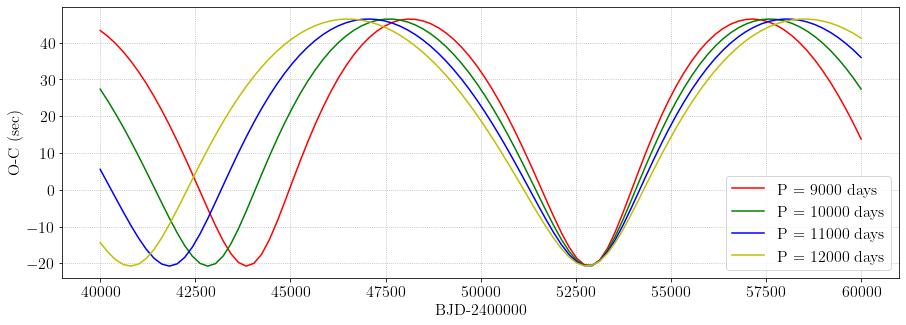

In [22]:
InputFile_out = "P_output_d.out"
Data_out   = np.genfromtxt(InputFile_out)

#Read the wd data: BJD vs. Relative flux
x_d = Data_out[:,0]
y_d = Data_out[:,5]

#print(y_range)

N_BMJD = 2400000
#Plotgraph
fig=plt.figure(figsize=(15, 5))
#plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray',label='Data')
# create a line plot for the mapping function
plt.plot(x_a, y_a, '-', color='red',label='P = 9000 days')
plt.plot(x_b, y_b, '-', color='green',label='P = 10000 days')
plt.plot(x_c, y_c, '-', color='blue',label='P = 11000 days')
plt.plot(x_d, y_d, '-', color='y',label='P = 12000 days')
#plt.plot(BJD_time, OC_s_ecc, lw=2, color='black')
#plt.xlim(-6000,6000)
#plt.ylim(-200,200)
#plt.ylim(-40,60)
plt.xlabel('BJD-'+str(N_BMJD))
plt.ylabel('O-C (sec)')
plt.grid(linestyle='dotted')
plt.legend(loc="best")
#####plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig("2022_Feb_week4_new_ephemeris_LTT_fit.jpg", dpi=1000)
plt.show()

In [23]:
#Parameters
K = 33.7       
P = 13000       
e = 0.39              
w = -1.36           
tau = 53025   

output = []
print("     BJD      MAno   EAno        O           C         OC")
for i in range(len_x):
 #   print(i, x[i])
    MAno = 2*np.pi/P*((t-tau)%P)
    EFunc = lambda x: x-e*np.sin(x)-MAno
    EAno = fsolve(EFunc, MAno)
    f = np.arccos((np.cos(EAno)-e)/(1-e*np.cos(EAno)))
    f = np.where(EAno>np.pi,-f,f)
    f = TAno(P,tau,e,t)
    O = Period*Epoch + T0 + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))
    C = P0*Epoch + T0
    dP = Period - P0
    dT0 = T0 - T0
    OC = dP*Epoch + dT0 + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))
    print('%0.5f %0.5f %0.5f %0.5f %0.5f %0.5f' %(x[i], MAno[i], EAno[i],  O[i], C[i], OC[i]))
    output.append('%0.5f %0.5f %0.5f %0.5f %0.5f %0.5f' %(x[i], MAno[i], EAno[i],  O[i], C[i], OC[i]))
    
data_out = output
f = open("P_output_e.out", 'w')
for i in range(len(data_out)):
    f.write(str(data_out[i])+ '\n')
f.close()

     BJD      MAno   EAno        O           C         OC
40000.00000 6.27110 6.26338 46121.39037 46141.61722 -20.22685
40202.02020 0.08556 0.13997 46324.76087 46343.63742 -18.87655
40404.04040 0.18320 0.29753 46528.90442 46545.65762 -16.75321
40606.06061 0.28084 0.45073 46733.69300 46747.67783 -13.98483
40808.08081 0.37848 0.59807 46938.96943 46949.69803 -10.72860
41010.10101 0.47612 0.73873 47144.57609 47151.71823 -7.14214
41212.12121 0.57376 0.87247 47350.37388 47353.73843 -3.36455
41414.14141 0.67140 0.99946 47556.25014 47555.75863 0.49150
41616.16162 0.76904 1.12010 47762.11874 47757.77884 4.33990
41818.18182 0.86668 1.23489 47967.91647 47959.79904 8.11743
42020.20202 0.96432 1.34437 48173.59838 48161.81924 11.77914
42222.22222 1.06197 1.44908 48379.13327 48363.83944 15.29383
42424.24242 1.15961 1.54952 48584.50009 48565.85964 18.64045
42626.26263 1.25725 1.64614 48789.68511 48767.87985 21.80526
42828.28283 1.35489 1.73936 48994.67981 48969.90005 24.77976
43030.30303 1.45253 1.829

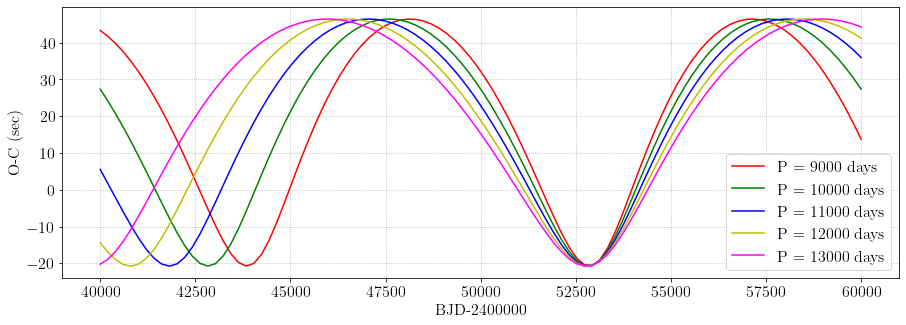

In [24]:
InputFile_out = "P_output_e.out"
Data_out   = np.genfromtxt(InputFile_out)

#Read the wd data: BJD vs. Relative flux
x_e = Data_out[:,0]
y_e = Data_out[:,5]

#print(y_range)

N_BMJD = 2400000
#Plotgraph
fig=plt.figure(figsize=(15, 5))
#plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray',label='Data')
# create a line plot for the mapping function
plt.plot(x_a, y_a, '-', color='red',label='P = 9000 days')
plt.plot(x_b, y_b, '-', color='green',label='P = 10000 days')
plt.plot(x_c, y_c, '-', color='blue',label='P = 11000 days')
plt.plot(x_d, y_d, '-', color='y',label='P = 12000 days')
plt.plot(x_e, y_e, '-', color='magenta',label='P = 13000 days')
#plt.plot(BJD_time, OC_s_ecc, lw=2, color='black')
#plt.xlim(-6000,6000)
#plt.ylim(-200,200)
#plt.ylim(-40,60)
plt.xlabel('BJD-'+str(N_BMJD))
plt.ylabel('O-C (sec)')
plt.grid(linestyle='dotted')
plt.legend(loc="best")
#####plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
plt.savefig("DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_P_rev2.pdf", format='pdf', dpi=1200)
plt.show()